In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats
from sklearn import svm
rcParams['figure.figsize'] = 6, 4
import seaborn as sns
import statsmodels.api as sm
plt.style.use('seaborn')

%pylab inline

C:\Users\Jonathan\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

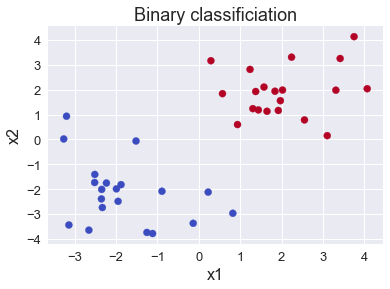

In [2]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.title('Binary classificiation', fontsize = 18)
plt.xlabel('x1', fontsize = 16)
plt.ylabel('x2', fontsize = 16)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axis('tight');


In [3]:
# Fit the model.  Using a linear SVM; very large penalty for misclassification.
# Since the data is linearly separable, it won't misclassify any points.
clf = svm.SVC(kernel='linear',C=10**100)  
clf.fit(X, Y);

In [4]:
# get the separating hyperplane w[0] x1 + w[1] x2 + intercept = 0
# transform to slope-intercept form: x2 = (-w[0]/w[1])x1 - (intercept/w[1])
w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

In [5]:
# plot the parallels to the separating hyperplane (slope = a) that go through the support vectors.

b = clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])

b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])

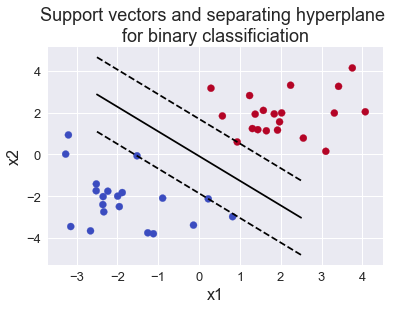

In [6]:
# plot the line, the points, and the nearest vectors to the plane
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))


plt.title('Support vectors and separating hyperplane \nfor binary classificiation', fontsize = 18)
plt.xlabel('x1', fontsize = 16)
plt.ylabel('x2', fontsize = 16)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axis('tight')
plt.show()


#### a. Report the separating hyperplane (line).

In [7]:
# your code here
x2 = a * x1 - (clf.intercept_[0]) / w[1]

print("The separating hyperplane is: x2 = {} * x1 - {}".format(round(a,4),round((clf.intercept_[0]) / w[1],4)))

The separating hyperplane is: x2 = -1.1769 * x1 - 0.0767


#### b. List the support vectors.

In [8]:
l = len(clf.support_vectors_)
print("The support vectors are: ")
for i in range(l):
    print("   {}".format(clf.support_vectors_[i]))

The support vectors are: 
   [ 0.22627536 -2.11810965]
   [-1.5180363  -0.06399383]
   [ 0.93564585  0.5969359 ]


#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

In [9]:
# your code here
b = clf.support_vectors_[0]
k1 = b[1] - a * b[0]
x2_down = a * x1 + (b[1] - a * b[0])
print("The lower hyperplane / line of margin is: x2 = {} * x1 + {}".format(round(a,4),round(b[1] - a * b[0],4)))

b = clf.support_vectors_[-1]
k2 = b[1] - a * b[0]
x2_up = a * x1 + (b[1] - a * b[0])
print("The upper hyperplane / line of margin is: x2 = {} * x1 +  {}".format(round(a,4),round(b[1] - a * b[0],4)))

The lower hyperplane / line of margin is: x2 = -1.1769 * x1 + -1.8518
The upper hyperplane / line of margin is: x2 = -1.1769 * x1 +  1.6981


#### d. Compute the width of the margin.

In [10]:
# your code here
marginWidth = round(1 / np.sqrt(np.sum(clf.coef_ ** 2)),4)
#marginWidth = round(k2 - k1,3)
print("Margin width calculated as difference between separating hyperplane, and either lower, or upper hyperplane.")
print("The margin width is {}".format(marginWidth))

Margin width calculated as difference between separating hyperplane, and either lower, or upper hyperplane.
The margin width is 1.1489


#### e. What would you expect to happen to the margin if the constant C was made very small?

Your answer here.  You can justify your intuitions with code if you'd like, but this is not required.


##### ANSWER:
If you decrease the constant C, we would expect the margin width to **INCREASE**, as the lower and upper hyperplanes will have a some observations on both sides of their boundaries (some observations will be misclassified). With the previously set high value for C, the hyperplanes exactly divide the binary classification.

## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following two questions:

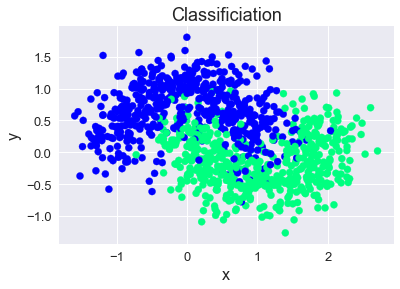

In [11]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('winter', 2));
plt.title('Classificiation', fontsize = 18)
plt.xlabel('x', fontsize = 16)
plt.ylabel('y', fontsize = 16)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axis('tight')
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [12]:
# Let's see how we do out of sample, after dividing the dataset into training and test.
clf = svm.SVC(kernel='poly') 
clf.fit(X_train, Y_train)

correctIS=1.0*(clf.predict(X_train)==Y_train).sum()/len(Y_train)
correctOS=1.0*(clf.predict(X_test)==Y_test).sum()/len(Y_test)

print "In sample, we successfully predict {} percent of the data".format((round(correctIS,4))*100)
print "Out of sample, we successfully predict {} percent of the data".format((round(correctOS,4))*100)


In sample, we successfully predict 81.34 percent of the data
Out of sample, we successfully predict 82.73 percent of the data


### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.



cVec = []
for i in range(4):
    degree = i + 1
    a = [np.exp(i) for i in np.linspace(-10,2*degree,200)]
    cVec.append(a)

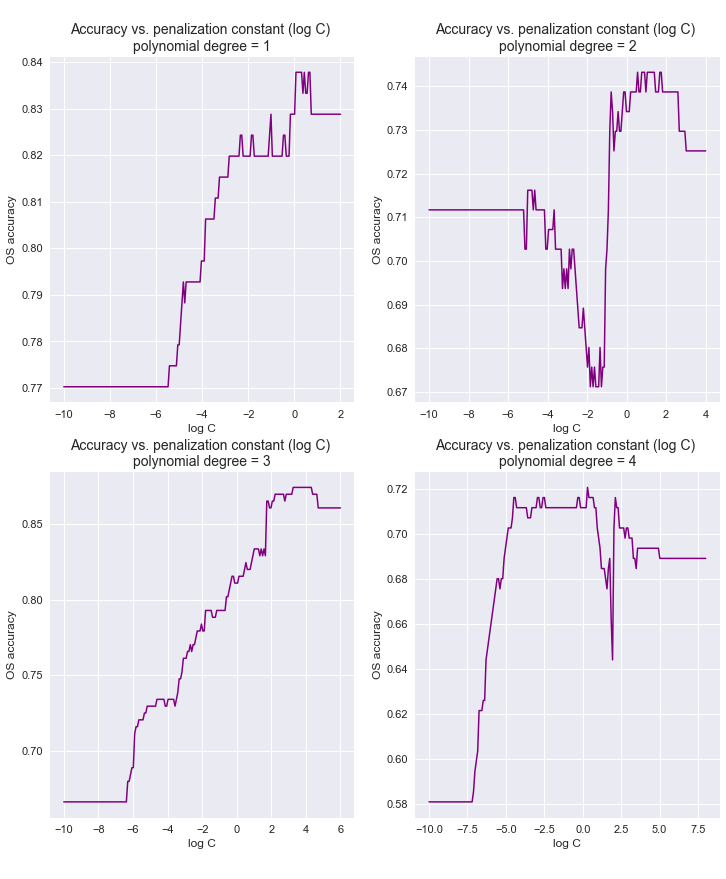

In [13]:
# your code here

# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

# When C is very small, we are willing to tolerate more mistakes. If C is very big, this
# means we hardly tolerate any mistakes. So, we cannot choose a very large C if our data is not
# really separable. Let's however choose from a broad range of reasonable options.

fig = plt.figure(figsize=(12, 14))


for i in range(4):
    ax = fig.add_subplot(2, 2, (i + 1))

    
    degree = i + 1
    C = [np.exp(i) for i in np.linspace(-10,2*degree,200)]

    OS = []
    for c in C:
        clf = svm.SVC(kernel='poly',C=c,degree=degree) 
        clf.fit(X_train_1, Y_train_1)
        correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
        OS.append(correct)

    ax.plot(np.linspace(-10,2*degree,200),OS, c="Purple", lw=1.5)
    plt.xlabel("log C\n\n", fontsize = 12)
    plt.ylabel("OS accuracy", fontsize = 12)
    plt.xticks(fontsize = 11)
    plt.yticks(fontsize = 11)

    
    plt.title("\nAccuracy vs. penalization constant (log C) \npolynomial degree = {}".format(degree), fontsize = 14)
    #plt.xlim(-10,10)

    

Reviewing the above charts, the OS accuracy is maximized with polynomial degree = 3, and $log(C)$ = 3.3.

### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [14]:
# your code here

### Optimal tuned parameters
optDegree = 3
optC = np.exp(3.3)

# Let's see how we do out of sample, after dividing the dataset into training and test.
clf = svm.SVC(kernel='poly', C=optC, degree=optDegree) 
clf.fit(X_train, Y_train)

correctIS=1.0*(clf.predict(X_train)==Y_train).sum()/len(Y_train)
correctOS=1.0*(clf.predict(X_test)==Y_test).sum()/len(Y_test)

print "In sample, we successfully predict {} percent of the data".format((round(correctIS,4))*100)
print "Out of sample, we successfully predict {} percent of the data".format((round(correctOS,4))*100)


In sample, we successfully predict 86.12 percent of the data
Out of sample, we successfully predict 89.09 percent of the data


The out-of-sample prediction is 89.09% (almost 90%) classification accuracy.

## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes


### a) Calculate the following sample probabilities:

P(Yes) = $\frac{6}{10}$  = 0.6

P(No) = $\frac{4}{10}$ = 0.4

P(Red|Yes) = $\frac{5}{6}$ = 0.833

P(SUV|Yes) = $\frac{2}{6}$ = 0.333

P(Domestic|Yes) = $\frac{3}{6}$ = 0.5

P(Red|No) = $\frac{1}{4}$ = 0.25

P(SUV|No) = $\frac{3}{4}$ = 0.75

P(Domestic|No) = $\frac{2}{4}$ = 0.5

### b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen?

$$ P(Yes | Red, Domestic, SUV) = \frac{P(Red, Domestic, SUV| Yes) P(Yes)}{P(Red, Domestic, SUV| Yes) P(Yes) + P(Red, Domestic, SUV| No) P(No)}$$

$$ = \frac{P(Red| Yes)P(Domestic| Yes)P(SUV| Yes) P(Yes)}{P(Red| Yes)P(Domestic| Yes)P(SUV| Yes) P(Yes) + P(Red| No) P(Domestic| No) P(SUV| No) P(No)}$$

$$ = \frac{\frac{5}{6}.\frac{3}{6}.\frac{2}{6} .\frac{6}{10}}{\frac{5}{6}.\frac{3}{6}.\frac{2}{6} .\frac{6}{10} + \frac{1}{4}.\frac{2}{4}.\frac{3}{4}.\frac{4}{10}}$$

$$ = \frac{\frac{1}{12}}{\frac{1}{12} + \frac{3}{80}}$$

$$ = 0.6897$$



## Task 4 (4+2+2+2=10pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [15]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

X_train.head()

,t_pre,glu,blood_p,triceps,serum,b_m,pedigree_f,age
0,3.0,158.0,64.0,13.0,387.0,31.2,0.295,24.0
1,0.0,84.0,64.0,22.0,66.0,35.8,0.545,21.0
2,9.0,120.0,72.0,22.0,56.0,20.8,0.733,48.0
3,4.0,110.0,76.0,20.0,100.0,28.4,0.118,27.0
4,2.0,100.0,66.0,20.0,90.0,32.9,0.867,28.0


In [16]:
# Training a binary Gaussian Naive Bayes Classifier with real-valued input attributes.
# Assume that the binary output variable takes on values 0 or 1. 
def trainGaussianNaiveBayes(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_mu1'] = X_1[j].mean()
        nbc[j+'_sigma1'] = X_1[j].std()
        nbc[j+'_mu0'] = X_0[j].mean()
        nbc[j+'_sigma0'] = X_0[j].std()
    return nbc

def testGaussianNaiveBayes(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            pdf1 = stats.norm.pdf(thevalue,loc=nbc[j+'_mu1'],scale=nbc[j+'_sigma1'])
            pdf0 = stats.norm.pdf(thevalue,loc=nbc[j+'_mu0'],scale=nbc[j+'_sigma0'])
            y_pred[i] = y_pred[i]*pdf1/pdf0 if pdf0 > 0 else 1E10
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [17]:
# your code here
naive_bayes_classifier = trainGaussianNaiveBayes(X_train,y_train)
#for i,j in naive_bayes_classifier.items():
#    print i
#    print j
#    print
y_pred_train = testGaussianNaiveBayes(X_train,naive_bayes_classifier)
y_pred_test = testGaussianNaiveBayes(X_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print 'In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train)
print 'Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test)

In sample prediction accuracy: 0.762711864407
Out of sample prediction accuracy: 0.791139240506


### b) What is the prior probability of diabetes, learned from the training data?

In [18]:
# your code here

prior = 1.*y_train.sum()/y_train.count()

print("The prior probability of diabetes learned from the training data is: {}".format(round(prior,4)))

The prior probability of diabetes learned from the training data is: 0.3008


### c) What is the mean and variance of each input variable for patients with diabetes?

In [19]:
# your code here
for j in X_train.columns:
    mean1 = round(naive_bayes_classifier [j+'_mu1'],4) 
    var1 = round(naive_bayes_classifier [j+'_sigma1']**2,4)
    print("For input variable {}, the mean is {}, and variance {}, " +
          "for patients WITH diabetes").format(j,mean1, var1)

For input variable t_pre, the mean is 4.0704, and variance 12.3807, for patients WITH diabetes
For input variable glu, the mean is 144.1408, and variance 937.9799, for patients WITH diabetes
For input variable blood_p, the mean is 74.5634, and variance 190.4209, for patients WITH diabetes
For input variable triceps, the mean is 33.4789, and variance 95.3103, for patients WITH diabetes
For input variable serum, the mean is 209.2113, and variance 16108.9404, for patients WITH diabetes
For input variable b_m, the mean is 35.2239, and variance 39.1687, for patients WITH diabetes
For input variable pedigree_f, the mean is 0.639, and variance 0.1928, for patients WITH diabetes
For input variable age, the mean is 35.7887, and variance 105.3404, for patients WITH diabetes


### d) What is the mean and variance of each input variable for patients without diabetes?

In [20]:
# your code here
for j in X_train.columns:
    mean0 = round(naive_bayes_classifier [j+'_mu0'],4) 
    var0 = round(naive_bayes_classifier [j+'_sigma0']**2,4)
    print("For input variable {}, the mean is {}, and variance {}, " +
          "for patients WITHOUT diabetes").format(j, mean0, var0)

For input variable t_pre, the mean is 2.6909, and variance 6.8124, for patients WITHOUT diabetes
For input variable glu, the mean is 111.4667, and variance 609.6894, for patients WITHOUT diabetes
For input variable blood_p, the mean is 69.2061, and variance 137.2012, for patients WITHOUT diabetes
For input variable triceps, the mean is 27.2, and variance 108.9293, for patients WITHOUT diabetes
For input variable serum, the mean is 127.0061, and variance 8369.7134, for patients WITHOUT diabetes
For input variable b_m, the mean is 31.7091, and variance 40.1653, for patients WITHOUT diabetes
For input variable pedigree_f, the mean is 0.4687, and variance 0.0851, for patients WITHOUT diabetes
For input variable age, the mean is 28.3939, and variance 72.8865, for patients WITHOUT diabetes


## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [21]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]


In [22]:
X_Labeled_train


,0,1,2
0,4,6,6
1,2,2,2
2,2,6,2
3,6,6,6
4,1,2,2
5,3,4,4
6,6,1,6
7,1,3,1
8,5,1,6


In [23]:
y_Labeled_train

0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    1
8    1
Name: y, dtype: int64

In [24]:
# Training a binary Naive Bayes Classifier with discrete input attributes.
# Assume that the binary output variable takes on values 0 or 1. 
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [25]:
def initializeNaiveBayesRandom(X_Unlabeled):
    nbc = {'prior':0.5}
    for j in X_Unlabeled.columns:
        thevalues = X_Unlabeled[j].unique()
        nbc[j+'_1'] = {}
        nbc[j+'_0'] = {}
        for jj in thevalues:
            nbc[j+'_1'][jj] = np.random.rand()
            nbc[j+'_0'][jj] = np.random.rand()
    return nbc
    
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1
        print 'Iteration',t,'of',num_iters
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled]).reset_index(drop=True)
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled]).reset_index(drop=True)
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [26]:
# your code here
naive_bayes_classifier = trainNaiveBayesDiscrete(X_Labeled_train,y_Labeled_train)

y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print 'Out of sample prediction accuracy:',round(1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test),4)



Out of sample prediction accuracy: 0.6944


### b) Improve the classification by using the unlabeled data, data_Unlabeled, and the EM semi-supervised algorithm to predict the labels of X_Labeled_test, and report the new accuracy.

In [27]:
# your code here
naive_bayes_classifier=EM(X_Labeled_train,y_Labeled_train,X_Unlabeled_train,num_iters=50);

y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task 
print 'Out of sample prediction accuracy:',round(1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test),4)


Iteration 1 of 50
Iteration 2 of 50
Iteration 3 of 50
Iteration 4 of 50
Iteration 5 of 50
Iteration 6 of 50
Iteration 7 of 50
Iteration 8 of 50
Iteration 9 of 50
Iteration 10 of 50
Iteration 11 of 50
Iteration 12 of 50
Iteration 13 of 50
Iteration 14 of 50
Iteration 15 of 50
Iteration 16 of 50
Iteration 17 of 50
Iteration 18 of 50
Iteration 19 of 50
Iteration 20 of 50
Iteration 21 of 50
Iteration 22 of 50
Iteration 23 of 50
Iteration 24 of 50
Iteration 25 of 50
Iteration 26 of 50
Iteration 27 of 50
Iteration 28 of 50
Iteration 29 of 50
Iteration 30 of 50
Iteration 31 of 50
Iteration 32 of 50
Iteration 33 of 50
Iteration 34 of 50
Iteration 35 of 50
Iteration 36 of 50
Iteration 37 of 50
Iteration 38 of 50
Iteration 39 of 50
Iteration 40 of 50
Iteration 41 of 50
Iteration 42 of 50
Iteration 43 of 50
Iteration 44 of 50
Iteration 45 of 50
Iteration 46 of 50
Iteration 47 of 50
Iteration 48 of 50
Iteration 49 of 50
Iteration 50 of 50
Out of sample prediction accuracy: 0.9444
